In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [2]:
df = pd.read_csv('../7. eda/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


1. Identify the columns with missing data from the given dataset.

In [3]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

4. Analyze the data and perform imputation using the best-fitted technique (mean, median, mode and KNN (k=5)) for the given column

In [4]:
df['Medal'].fillna('None', inplace = True)

C:\Users\Yakina\AppData\Local\Temp\ipykernel_1096\1536747687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('None', inplace = True)


In [5]:
imputer = SimpleImputer(strategy='median')
df[['Height', 'Weight', 'Age']] = pd.DataFrame(imputer.fit_transform(df[['Height', 'Weight', 'Age']]), columns=[['Height', 'Weight', 'Age']])

In [6]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

2. Perform type conversions for required numeric columns

In [7]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
df['Age'] = df['Age'].astype(int)
df['Weight'] = df['Weight'].astype(int)
df['Height'] = df['Height'].astype(int)

df.dtypes

ID         int64
Name      object
Sex       object
Age        int64
Height     int64
Weight     int64
Team      object
NOC       object
Games     object
Year       int64
Season    object
City      object
Sport     object
Event     object
Medal     object
dtype: object

3. Perform One-Hot Encoding, Ordinal Encoding and Label Encoding on the required columns

In [9]:
df.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       143
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

In [10]:
label_encoder = LabelEncoder()
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Medal'] = label_encoder.fit_transform(df['Medal'])

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24,180,80,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,2
1,2,A Lamusi,1,23,170,60,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,2
2,3,Gunnar Nielsen Aaby,1,24,175,70,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,2
3,4,Edgar Lindenau Aabye,1,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,0,21,185,82,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,2


5. Identify the outliers from the given columns using statistical methods (IQR, z-score)

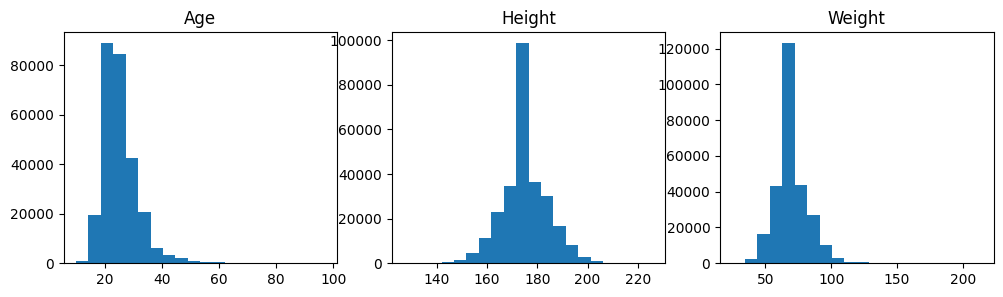

In [11]:
plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20)
plt.title('Age')

plt.subplot(1, 3, 2)
plt.hist(df['Height'], bins=20)
plt.title('Height')

plt.subplot(1, 3, 3)
plt.hist(df['Weight'], bins=20)
plt.title('Weight')
plt.show()

z-score

In [12]:
means = df[['Age', 'Height', 'Weight']].mean()
stds = df[['Age', 'Height', 'Weight']].std()
means, stds

(Age        25.502493
 Height    175.263740
 Weight     70.537549
 dtype: float64,
 Age        6.287361
 Height     9.279170
 Weight    12.577563
 dtype: float64)

In [13]:
highest_age = means.Age + 3*stds.Age
lowest_age = means.Age - 3*stds.Age
highest_age, lowest_age

(np.float64(44.36457736447937), np.float64(6.640409430840709))

In [14]:

df[(df['Age'] > highest_age) | (df['Age'] < lowest_age)]['Age']

58        54
90        47
126       45
127       49
128       53
          ..
270200    58
270202    47
270203    47
270352    45
270972    47
Name: Age, Length: 4406, dtype: int64

In [15]:
highest_height = means.Height + 3*stds.Height
lowest_height = means.Height - 3*stds.Height
highest_height, lowest_height

(np.float64(203.1012482183908), np.float64(147.42623079428276))

In [16]:
df[(df['Height'] > highest_age) | (df['Height'] < lowest_age)]['Height']

0         180
1         170
2         175
3         175
4         185
         ... 
271111    179
271112    176
271113    176
271114    185
271115    185
Name: Height, Length: 271116, dtype: int64

In [17]:
highest_weight = means.Weight + 3*stds.Weight
lowest_weight = means.Weight - 3*stds.Weight
highest_weight, lowest_weight

(np.float64(108.27023603163005), np.float64(32.80486097481738))

In [18]:
df[(df['Weight'] > highest_age) | (df['Weight'] < lowest_age)]['Weight']

0         80
1         60
2         70
3         70
4         82
          ..
271111    89
271112    59
271113    59
271114    96
271115    96
Name: Weight, Length: 268135, dtype: int64

IQR

In [19]:
p25 = df[['Age', 'Height', 'Weight']].quantile(0.25)
p75 = df[['Age', 'Height', 'Weight']].quantile(0.75)
iqr = p75 - p25
p25, p75, iqr

(Age        22.0
 Height    170.0
 Weight     63.0
 Name: 0.25, dtype: float64,
 Age        28.0
 Height    180.0
 Weight     75.0
 Name: 0.75, dtype: float64,
 Age        6.0
 Height    10.0
 Weight    12.0
 dtype: float64)

In [20]:
upper_age = p75.Age + 1.5 * iqr.Age
lower_age = p25.Age - 1.5 * iqr.Age
upper_age, lower_age

(np.float64(37.0), np.float64(13.0))

In [21]:
df[(df['Age'] > upper_age) | (df['Age'] < lower_age)]['Age']

58        54
89        43
90        47
124       41
126       45
          ..
270955    41
270970    39
270971    43
270972    47
271090    38
Name: Age, Length: 11981, dtype: int64

In [22]:
upper_height = p75.Height + 1.5 * iqr.Height
lower_height = p25.Height - 1.5 * iqr.Height
upper_height, lower_height

(np.float64(195.0), np.float64(155.0))

In [23]:
df[(df['Height'] > upper_height) | (df['Height'] < lower_height)]['Height']

158       198
299       203
329       154
330       154
331       153
         ... 
271026    202
271047    197
271048    197
271049    197
271091    200
Name: Height, Length: 10532, dtype: int64

In [24]:
upper_weight = p75.Weight + 1.5 * iqr.Weight
lower_weight = p25.Weight - 1.5 * iqr.Weight
upper_weight, lower_weight

(np.float64(93.0), np.float64(45.0))

In [25]:
df[(df['Weight'] > upper_weight) | (df['Weight'] < lower_weight)]['Weight']

28         96
57        130
80        125
99         98
137       106
         ... 
271026     98
271089     95
271090     95
271114     96
271115     96
Name: Weight, Length: 15570, dtype: int64

6. Explore sklearn’s module for outlier detection (eg. LOF, OneClassSVM)

In [26]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
df['age_lof'] = lof.fit_predict(df[['Age']])
df['age_lof'].value_counts()

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


age_lof
 1    270876
-1       240
Name: count, dtype: int64

In [27]:
df[df['age_lof']==-1].Age

129       57
4467      57
7433      75
9369      68
9370      68
          ..
259374    57
259375    57
259376    57
260799    72
261344    57
Name: Age, Length: 240, dtype: int64

In [28]:
ifor = IsolationForest(contamination=0.001, random_state=42)
df['height_iforest'] = ifor.fit_predict(df[['Height']])
df['height_iforest'].value_counts()

height_iforest
 1    270939
-1       177
Name: count, dtype: int64

In [29]:
df[df['height_iforest']==-1].Height

3510      132
3778      132
7467      215
11419     135
11420     135
         ... 
269053    221
269409    217
270740    218
270741    218
270742    218
Name: Height, Length: 177, dtype: int64

In [30]:
# ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
# df['weight_svm'] = ocsvm.fit_predict(df[['Weight']])
# df['weight_svm'].value_counts()

In [31]:
# df[df['weight_svm']==-1].Weight

In [32]:
df.drop(['age_lof', 'height_iforest'], axis=1, inplace=True)

7. Identify the categorical and numeric columns in the dataset

In [33]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Season', 'Medal'], dtype='object')

In [34]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Name', 'Team', 'NOC', 'Games', 'City', 'Sport', 'Event'], dtype='object')

8. Perform scaling using (Min-max Scaler/StandardScaler) on the required columns

In [35]:
to_scale = ['Age', 'Height', 'Weight']

In [36]:
df_num = df[numeric_columns].copy()
df_num.drop(columns=['ID'], inplace=True)

In [37]:
scaler = StandardScaler()
df_num[to_scale] = scaler.fit_transform(df_num[to_scale])

df_num.head()

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,-0.238971,0.510420,0.752329,1992,0,2
1,1,-0.398020,-0.567265,-0.837807,2012,0,2
2,1,-0.238971,-0.028423,-0.042739,1920,0,2
3,1,1.351524,-0.028423,-0.042739,1900,0,1
4,0,-0.716119,1.049262,0.911343,1988,1,2


9. Perform feature selection to identify the columns relevant for the target column.(Filter Method/Wrapper Method) 

In [38]:
corr_matrix = df_num.corr()
corr_with_medal = corr_matrix['Medal'].abs().sort_values(ascending=False)
print(corr_with_medal)

Medal     1.000000
Weight    0.034775
Height    0.034399
Year      0.021103
Season    0.018406
Age       0.008899
Sex       0.002710
Name: Medal, dtype: float64


In [39]:
rfc = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=rfc, n_features_to_select=4)

rfe.fit(df_num.drop('Medal', axis=1), df_num['Medal'])
selected_features = df_num.drop('Medal', axis=1).columns[rfe.support_]

print("Selected features by RFE:", selected_features)

Selected features by RFE: Index(['Age', 'Height', 'Weight', 'Year'], dtype='object')


10. Identify and perform feature extraction by creating new columns from the existing columns for dimensionality reduction.

In [40]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [41]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,1,24,180,80,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,2,24.691358
1,2,A Lamusi,1,23,170,60,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,2,20.761246
2,3,Gunnar Nielsen Aaby,1,24,175,70,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,2,22.857143
3,4,Edgar Lindenau Aabye,1,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,22.857143
4,5,Christine Jacoba Aaftink,0,21,185,82,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,2,23.959094


11. Perform dimensionality reduction using PCA and t-SNE. Compare the features obtained from both methods

In [42]:
df_num.head()

,Sex,Age,Height,Weight,Year,Season,Medal
0,1,-0.238971,0.510420,0.752329,1992,0,2
1,1,-0.398020,-0.567265,-0.837807,2012,0,2
2,1,-0.238971,-0.028423,-0.042739,1920,0,2
3,1,1.351524,-0.028423,-0.042739,1900,0,1
4,0,-0.716119,1.049262,0.911343,1988,1,2


In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_num[['Age', 'Height', 'Weight']])

df_pca1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca1)

             PC1       PC2
0       0.819363 -0.420697
1      -1.057714 -0.178779
2      -0.101688 -0.222259
3       0.248061  1.327317
4       1.194426 -1.007353
...          ...       ...
271111  1.416489  0.288378
271112 -0.529280  0.327490
271113 -0.529280  0.327490
271114  2.281060  0.253119
271115  2.420960  0.872950

[271116 rows x 2 columns]


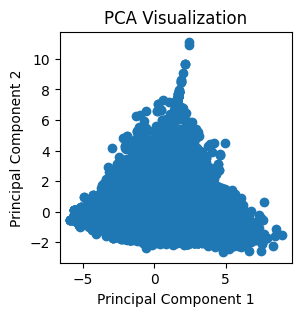

In [44]:
plt.figure(figsize=(3, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [45]:
# tsne = TSNE(n_components=2, perplexity=50, random_state=42)
# X_tsne = tsne.fit_transform(df_num[['Age', 'Height', 'Weight']])

# df_tsne1 = pd.DataFrame(X_tsne, columns=['COmponent 1', 'COmponent 2'])
# print(df_tsne1)

In [46]:
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Visualization')
# plt.show()

12. Analyze the distribution of the target labels in the dataset.
 - Perform sampling to obtain an evenly distributed dataset.

In [ ]:
df['Medal'].value_counts()

Medal
2    231333
1     13372
0     13295
3     13116
Name: count, dtype: int64


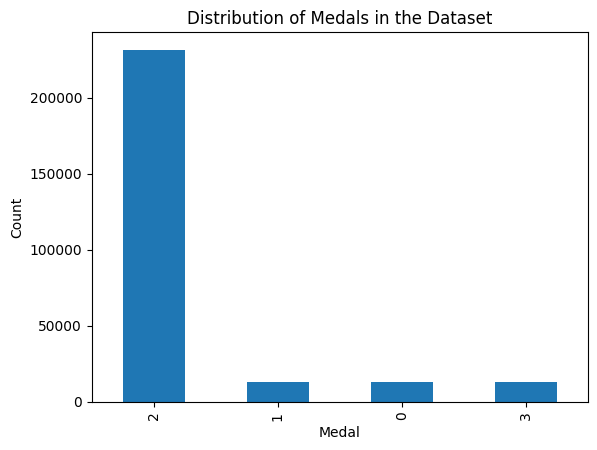

In [48]:
df['Medal'].value_counts().plot(kind='bar')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.title('Distribution of Medals in the Dataset')
plt.show()

In [60]:
X = df.drop(columns=['Medal'])
y = df['Medal']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

Medal
2    231333
1    231333
0    231333
3    231333
Name: count, dtype: int64


In [61]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

Medal
0    13116
1    13116
2    13116
3    13116
Name: count, dtype: int64


In [62]:
X = df_num.drop(columns=['Medal'])
y = df_num['Medal']

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

Medal
2    224093
1    221231
0    221170
3    221112
Name: count, dtype: int64
